<h3 style='color:blue' align='center'>Handling imbalanced data in customer churn prediction</h3>

Customer churn prediction is to measure why customers are leaving a business. In this tutorial we will be looking at customer churn in telecom business. We will build a deep learning model to predict the churn and use precision,recall, f1-score to measure performance of our model.
We will then handle imbalance in data using various techniques and improve f1-score

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
import warnings
warnings.filterwarnings('ignore')

**Load the data**

In [4]:
df = pd.read_csv("customer_churn.csv")
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
305,1248-DYXUB,Male,0,Yes,Yes,52,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,24.80,1229.1,No
2253,0336-PIKEI,Male,1,Yes,No,72,Yes,No,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Bank transfer (automatic),74.40,5360.75,No
5666,8318-LCNBW,Male,0,Yes,No,35,No,No phone service,DSL,Yes,...,Yes,No,Yes,Yes,One year,No,Credit card (automatic),53.15,1930.9,No
1442,3253-HKOKL,Female,0,Yes,Yes,52,Yes,No,Fiber optic,Yes,...,Yes,No,Yes,Yes,One year,No,Electronic check,100.30,5244.45,No
2628,2792-LSHWX,Female,0,No,No,1,Yes,No,Fiber optic,Yes,...,No,Yes,No,No,Month-to-month,Yes,Mailed check,83.40,83.4,No


In [5]:
df.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [6]:
517400/df.shape[0]

73.46301292063042

**First of all, drop customerID column as it is of no use**

In [7]:
df.drop('customerID',axis='columns',inplace=True)

In [8]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

**Quick glance at above makes me realize that TotalCharges should be float but it is an object. Let's check what's going on with  this column**

In [9]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

**Ahh... it is string. Lets convert it to numbers**

In [10]:
pd.to_numeric(df.TotalCharges,errors='coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [11]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [12]:
df.shape

(7043, 20)

In [13]:
df.iloc[488].TotalCharges

' '

In [14]:
df[df.TotalCharges!=' '].shape

(7032, 20)

**Remove rows with space in TotalCharges**

In [15]:
df1 = df[df.TotalCharges!=' ']
df1.shape

(7032, 20)

In [16]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [17]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

In [18]:
df1.TotalCharges.values

array([  29.85, 1889.5 ,  108.15, ...,  346.45,  306.6 , 6844.5 ])

In [19]:
df1[df1.Churn=='No']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,Female,0,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,No
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


**Data Visualization**

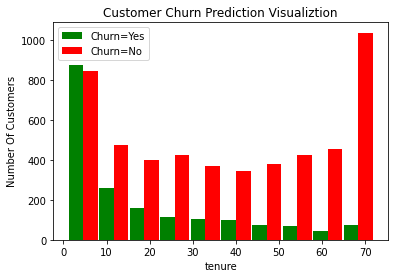

In [20]:
tenure_churn_no = df1[df1.Churn=='No'].tenure
tenure_churn_yes = df1[df1.Churn=='Yes'].tenure

plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

blood_sugar_men = [113, 85, 90, 150, 149, 88, 93, 115, 135, 80, 77, 82, 129]
blood_sugar_women = [67, 98, 89, 120, 133, 150, 84, 69, 89, 79, 120, 112, 100]

plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

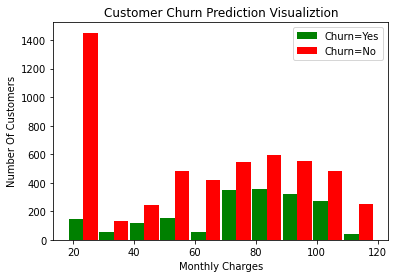

In [21]:
mc_churn_no = df1[df1.Churn=='No'].MonthlyCharges      
mc_churn_yes = df1[df1.Churn=='Yes'].MonthlyCharges      

plt.xlabel("Monthly Charges")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

blood_sugar_men = [113, 85, 90, 150, 149, 88, 93, 115, 135, 80, 77, 82, 129]
blood_sugar_women = [67, 98, 89, 120, 133, 150, 84, 69, 89, 79, 120, 112, 100]

plt.hist([mc_churn_yes, mc_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

**Many of the columns are yes, no etc. Let's print unique values in object columns to see data values**

In [22]:
def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}') 

In [23]:
print_unique_col_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


**Some of the columns have no internet service or no phone service, that can be replaced with a simple No**

In [24]:
df1.replace('No internet service','No',inplace=True)
df1.replace('No phone service','No',inplace=True)

In [25]:
print_unique_col_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


**Convert Yes and No to 1 or 0**

In [26]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_columns:
    df1[col].replace({'Yes': 1,'No': 0},inplace=True)

In [27]:
for col in df1:
    print(f'{col}: {df1[col].unique()}') 

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


In [28]:
df1['gender'].replace({'Female':1,'Male':0},inplace=True)

In [29]:
df1.gender.unique()

array([1, 0], dtype=int64)

**One hot encoding for categorical columns**

In [30]:
df2 = pd.get_dummies(data=df1, columns=['InternetService','Contract','PaymentMethod'])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [31]:
df2.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
3029,0,0,1,1,23,1,1,0,0,0,...,1,0,0,0,1,0,0,1,0,0
3211,1,0,0,0,17,1,0,0,0,0,...,0,0,1,0,1,0,0,1,0,0
3516,0,0,0,0,3,1,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
6256,1,0,0,0,1,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1
1395,0,0,1,0,41,1,1,0,0,1,...,1,0,0,0,1,0,0,0,1,0


In [32]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [33]:
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [34]:
for col in df2:
    print(f'{col}: {df2[col].unique()}')

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [

**Train test split**

In [35]:
X = df2.drop('Churn',axis='columns')
y = testLabels = df2.Churn.astype(np.float32)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [36]:
y_train.value_counts()

0.0    4130
1.0    1495
Name: Churn, dtype: int64

In [37]:
y.value_counts()

0.0    5163
1.0    1869
Name: Churn, dtype: int64

In [38]:
5163/1869

2.7624398073836276

In [39]:
y_test.value_counts()

0.0    1033
1.0     374
Name: Churn, dtype: int64

In [40]:
X_train.shape

(5625, 26)

In [41]:
X_test.shape

(1407, 26)

In [42]:
X_train[:10]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
684,1,0,0,0,0.000000,1,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
2446,1,0,0,0,0.239437,1,1,0,1,0,...,0,1,0,1,0,0,0,1,0,0
1680,0,0,1,1,0.774648,1,1,0,0,0,...,0,0,1,0,1,0,0,0,0,1
2220,0,0,1,0,1.000000,1,0,1,1,0,...,1,0,0,0,0,1,1,0,0,0
2842,1,0,0,0,0.042254,0,0,1,0,1,...,1,0,0,1,0,0,0,0,0,1
5131,1,0,1,0,0.605634,1,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
4372,0,0,1,1,0.000000,1,0,0,0,0,...,0,0,1,1,0,0,1,0,0,0
4687,0,0,1,0,0.295775,1,0,0,0,1,...,0,1,0,1,0,0,0,1,0,0
2385,1,0,0,1,0.028169,0,0,0,1,0,...,1,0,0,1,0,0,0,0,0,1
6773,0,1,1,0,0.507042,1,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [43]:
len(X_train.columns)

26

**Build a model (ANN) in tensorflow/keras**

In [44]:
from tensorflow_addons import losses

ModuleNotFoundError: No module named 'tensorflow_addons'

In [48]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix , classification_report

In [49]:
def ANN(X_train, y_train, X_test, y_test, loss, weights):
    model = keras.Sequential([
        keras.layers.Dense(26, input_dim=26, activation='relu'),
        keras.layers.Dense(15, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])
    
    if weights == -1:
        model.fit(X_train, y_train, epochs=100)
    else:
        model.fit(X_train, y_train, epochs=100, class_weight = weights)
    
    print(model.evaluate(X_test, y_test))
    
    y_preds = model.predict(X_test)
    y_preds = np.round(y_preds)
    
    print("Classification Report: \n", classification_report(y_test, y_preds))
    
    return y_preds

In [50]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4940 - accuracy: 0.7593
Epoch 2/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4263 - accuracy: 0.7988
Epoch 3/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4201 - accuracy: 0.7984
Epoch 4/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4177 - accuracy: 0.7995
Epoch 5/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4121 - accuracy: 0.8041
Epoch 6/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4113 - accuracy: 0.8060
Epoch 7/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4088 - accuracy: 0.8080
Epoch 8/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4075 - accuracy: 0.8064
Epoch 9/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4058 - accuracy: 0.8059
Epoch 10/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4047 - accura

## Mitigating Skewdness of Data

### Method 1: Undersampling

reference: https://www.kaggle.com/rafjaa/resampling-strategies-for-imbalanced-datasets

In [45]:
# Class count
count_class_0, count_class_1 = df1.Churn.value_counts()

# Divide by class
df_class_0 = df2[df2['Churn'] == 0]
df_class_1 = df2[df2['Churn'] == 1]

In [47]:
df1.Churn.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [46]:
# Undersample 0-class and concat the DataFrames of both class
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_test_under.Churn.value_counts())

Random under-sampling:
1    1869
0    1869
Name: Churn, dtype: int64


In [53]:
X = df_test_under.drop('Churn',axis='columns')
y = df_test_under['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [54]:
# Number of classes in training Data
y_train.value_counts()

1    1495
0    1495
Name: Churn, dtype: int64

**Printing Classification in the last, Scroll down till the last epoch to watch the classification report**

In [55]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 0s 1ms/step - loss: 0.5709 - accuracy: 0.7375
Epoch 2/100
94/94 [==============================] - 0s 1ms/step - loss: 0.5009 - accuracy: 0.7656
Epoch 3/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4873 - accuracy: 0.7692
Epoch 4/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4828 - accuracy: 0.7669
Epoch 5/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4808 - accuracy: 0.7652
Epoch 6/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4781 - accuracy: 0.7706
Epoch 7/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4763 - accuracy: 0.7716
Epoch 8/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4739 - accuracy: 0.7709
Epoch 9/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4721 - accuracy: 0.7759
Epoch 10/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4717 - accuracy: 0.7736
Epoch 11/

94/94 [==============================] - 0s 1ms/step - loss: 0.3910 - accuracy: 0.8161
Epoch 84/100
94/94 [==============================] - 0s 1ms/step - loss: 0.3908 - accuracy: 0.8201
Epoch 85/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3898 - accuracy: 0.8191
Epoch 86/100
94/94 [==============================] - 0s 1ms/step - loss: 0.3885 - accuracy: 0.8184
Epoch 87/100
94/94 [==============================] - 0s 1ms/step - loss: 0.3921 - accuracy: 0.8174
Epoch 88/100
94/94 [==============================] - 0s 1ms/step - loss: 0.3883 - accuracy: 0.8204
Epoch 89/100
94/94 [==============================] - 0s 1ms/step - loss: 0.3863 - accuracy: 0.8234
Epoch 90/100
94/94 [==============================] - 0s 1ms/step - loss: 0.3856 - accuracy: 0.8231
Epoch 91/100
94/94 [==============================] - 0s 1ms/step - loss: 0.3846 - accuracy: 0.8204
Epoch 92/100
94/94 [==============================] - 0s 1ms/step - loss: 0.3847 - accuracy: 0.8211
Epoch 93/100


Check classification report above. f1-score for minority class 1 improved from **0.57 to 0.76**. Score for class 0 reduced to 0.75 from 0.85 but that's ok. We have more generalized classifier which classifies both classes with similar prediction score

### Method2: Oversampling

In [56]:
# Oversample 1-class and concat the DataFrames of both classes
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_test_over.Churn.value_counts())

Random over-sampling:
1    5163
0    5163
Name: Churn, dtype: int64


In [57]:
X = df_test_over.drop('Churn',axis='columns')
y = df_test_over['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [58]:
# Number of classes in training Data
y_train.value_counts()

1    4130
0    4130
Name: Churn, dtype: int64

In [59]:
loss = keras.losses.BinaryCrossentropy()
weights = -1
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
259/259 [==============================] - 0s 1ms/step - loss: 0.5655 - accuracy: 0.7068
Epoch 2/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4985 - accuracy: 0.7529
Epoch 3/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4913 - accuracy: 0.7607
Epoch 4/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4854 - accuracy: 0.7650
Epoch 5/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4814 - accuracy: 0.7655
Epoch 6/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4787 - accuracy: 0.7688
Epoch 7/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4769 - accuracy: 0.7703
Epoch 8/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4742 - accuracy: 0.7714
Epoch 9/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4717 - accuracy: 0.7703
Epoch 10/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4693 - accura

Check classification report above. f1-score for minority class 1 improved from **0.57 to 0.76**. Score for class 0 reduced to 0.75 from 0.85 but that's ok. We have more generalized classifier which classifies both classes with similar prediction score

### Method3: SMOTE

To install imbalanced-learn library use **pip install imbalanced-learn** command

In [60]:
X = df2.drop('Churn',axis='columns')
y = df2['Churn']

In [61]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_sample(X, y)

y_sm.value_counts()

1    5163
0    5163
Name: Churn, dtype: int64

In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=15, stratify=y_sm)

In [63]:
# Number of classes in training Data
y_train.value_counts()

1    4130
0    4130
Name: Churn, dtype: int64

In [64]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
259/259 [==============================] - 0s 1ms/step - loss: 0.5222 - accuracy: 0.7470
Epoch 2/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4716 - accuracy: 0.7712
Epoch 3/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4627 - accuracy: 0.7798
Epoch 4/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4552 - accuracy: 0.7824
Epoch 5/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4518 - accuracy: 0.7852
Epoch 6/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4472 - accuracy: 0.7860
Epoch 7/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4443 - accuracy: 0.7904
Epoch 8/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4396 - accuracy: 0.7953
Epoch 9/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4367 - accuracy: 0.7944
Epoch 10/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4350 - accura

SMOT Oversampling increases f1 score of minority class 1 from **0.57 to 0.81 (huge improvement)** Also over all accuracy improves from 0.78 to 0.80

### Method4: Use of Ensemble with undersampling

In [65]:
df2.Churn.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [66]:
# Regain Original features and labels
X = df2.drop('Churn',axis='columns')
y = df2['Churn']

In [67]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [68]:
y_train.value_counts()

0    4130
1    1495
Name: Churn, dtype: int64

model1 --> class1(1495) + class0(0, 1495)

model2 --> class1(1495) + class0(1496, 2990)

model3 --> class1(1495) + class0(2990, 4130)

In [73]:
df3 = X_train.copy()
df3['Churn'] = y_train

In [74]:
df3.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
684,1,0,0,0,0.000000,1,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0
2446,1,0,0,0,0.239437,1,1,0,1,0,...,1,0,1,0,0,0,1,0,0,1
1680,0,0,1,1,0.774648,1,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
2220,0,0,1,0,1.000000,1,0,1,1,0,...,0,0,0,0,1,1,0,0,0,0
2842,1,0,0,0,0.042254,0,0,1,0,1,...,0,0,1,0,0,0,0,0,1,0


In [75]:
df3_class0 = df3[df3.Churn==0]
df3_class1 = df3[df3.Churn==1]

In [76]:
def get_train_batch(df_majority, df_minority, start, end):
    df_train = pd.concat([df_majority[start:end], df_minority], axis=0)

    X_train = df_train.drop('Churn', axis='columns')
    y_train = df_train.Churn
    return X_train, y_train    

In [77]:
X_train, y_train = get_train_batch(df3_class0, df3_class1, 0, 1495)

y_pred1 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 0s 1ms/step - loss: 0.5840 - accuracy: 0.7164
Epoch 2/100
94/94 [==============================] - 0s 1ms/step - loss: 0.5094 - accuracy: 0.7542
Epoch 3/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4964 - accuracy: 0.7656
Epoch 4/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4893 - accuracy: 0.7649
Epoch 5/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4844 - accuracy: 0.7672
Epoch 6/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4817 - accuracy: 0.7689
Epoch 7/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4767 - accuracy: 0.7719
Epoch 8/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4758 - accuracy: 0.7722
Epoch 9/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4733 - accuracy: 0.7753
Epoch 10/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4702 - accuracy: 0.7753
Epoch 11/

94/94 [==============================] - 0s 1ms/step - loss: 0.3921 - accuracy: 0.8244
Epoch 84/100
94/94 [==============================] - 0s 1ms/step - loss: 0.3879 - accuracy: 0.8247
Epoch 85/100
94/94 [==============================] - 0s 1ms/step - loss: 0.3908 - accuracy: 0.8284
Epoch 86/100
94/94 [==============================] - 0s 1ms/step - loss: 0.3880 - accuracy: 0.8221
Epoch 87/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3894 - accuracy: 0.8258
Epoch 88/100
94/94 [==============================] - 0s 1ms/step - loss: 0.3862 - accuracy: 0.8271
Epoch 89/100
94/94 [==============================] - 0s 1ms/step - loss: 0.3881 - accuracy: 0.8284
Epoch 90/100
94/94 [==============================] - 0s 1ms/step - loss: 0.3843 - accuracy: 0.8268
Epoch 91/100
94/94 [==============================] - 0s 1ms/step - loss: 0.3847 - accuracy: 0.8268
Epoch 92/100
94/94 [==============================] - 0s 1ms/step - loss: 0.3865 - accuracy: 0.8268
Epoch 93/100


In [78]:
X_train, y_train = get_train_batch(df3_class0, df3_class1, 1495, 2990)

y_pred2 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 0s 1ms/step - loss: 0.6486 - accuracy: 0.6328
Epoch 2/100
94/94 [==============================] - 0s 1ms/step - loss: 0.5236 - accuracy: 0.7522
Epoch 3/100
94/94 [==============================] - 0s 1ms/step - loss: 0.5005 - accuracy: 0.7572
Epoch 4/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4935 - accuracy: 0.7592
Epoch 5/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4883 - accuracy: 0.7562
Epoch 6/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4845 - accuracy: 0.7605
Epoch 7/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4795 - accuracy: 0.7625
Epoch 8/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4778 - accuracy: 0.7642
Epoch 9/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4747 - accuracy: 0.7659
Epoch 10/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4719 - accuracy: 0.7692
Epoch 11/

94/94 [==============================] - 0s 1ms/step - loss: 0.3779 - accuracy: 0.8227
Epoch 84/100
94/94 [==============================] - 0s 1ms/step - loss: 0.3769 - accuracy: 0.8221
Epoch 85/100
94/94 [==============================] - 0s 1ms/step - loss: 0.3758 - accuracy: 0.8281
Epoch 86/100
94/94 [==============================] - 0s 1ms/step - loss: 0.3749 - accuracy: 0.8308
Epoch 87/100
94/94 [==============================] - 0s 1ms/step - loss: 0.3730 - accuracy: 0.8258
Epoch 88/100
94/94 [==============================] - 0s 1ms/step - loss: 0.3737 - accuracy: 0.8231
Epoch 89/100
94/94 [==============================] - 0s 1ms/step - loss: 0.3789 - accuracy: 0.8227
Epoch 90/100
94/94 [==============================] - 0s 1ms/step - loss: 0.3718 - accuracy: 0.8318
Epoch 91/100
94/94 [==============================] - 0s 1ms/step - loss: 0.3700 - accuracy: 0.8284
Epoch 92/100
94/94 [==============================] - 0s 1ms/step - loss: 0.3703 - accuracy: 0.8268
Epoch 93/100


In [79]:
X_train, y_train = get_train_batch(df3_class0, df3_class1, 2990, 4130)

y_pred3 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
83/83 [==============================] - 0s 1ms/step - loss: 0.6392 - accuracy: 0.6676
Epoch 2/100
83/83 [==============================] - 0s 1ms/step - loss: 0.5260 - accuracy: 0.7609
Epoch 3/100
83/83 [==============================] - 0s 1ms/step - loss: 0.4914 - accuracy: 0.7674
Epoch 4/100
83/83 [==============================] - 0s 1ms/step - loss: 0.4835 - accuracy: 0.7715
Epoch 5/100
83/83 [==============================] - 0s 1ms/step - loss: 0.4793 - accuracy: 0.7738
Epoch 6/100
83/83 [==============================] - 0s 1ms/step - loss: 0.4751 - accuracy: 0.7787
Epoch 7/100
83/83 [==============================] - 0s 1ms/step - loss: 0.4736 - accuracy: 0.7731
Epoch 8/100
83/83 [==============================] - 0s 1ms/step - loss: 0.4708 - accuracy: 0.7818
Epoch 9/100
83/83 [==============================] - 0s 1ms/step - loss: 0.4700 - accuracy: 0.7772
Epoch 10/100
83/83 [==============================] - 0s 1ms/step - loss: 0.4679 - accuracy: 0.7810
Epoch 11/

83/83 [==============================] - 0s 1ms/step - loss: 0.3709 - accuracy: 0.8357
Epoch 84/100
83/83 [==============================] - 0s 1ms/step - loss: 0.3704 - accuracy: 0.8387
Epoch 85/100
83/83 [==============================] - 0s 1ms/step - loss: 0.3687 - accuracy: 0.8391
Epoch 86/100
83/83 [==============================] - 0s 1ms/step - loss: 0.3675 - accuracy: 0.8444
Epoch 87/100
83/83 [==============================] - 0s 1ms/step - loss: 0.3649 - accuracy: 0.8410
Epoch 88/100
83/83 [==============================] - 0s 1ms/step - loss: 0.3669 - accuracy: 0.8440
Epoch 89/100
83/83 [==============================] - 0s 1ms/step - loss: 0.3677 - accuracy: 0.8387
Epoch 90/100
83/83 [==============================] - 0s 1ms/step - loss: 0.3633 - accuracy: 0.8459
Epoch 91/100
83/83 [==============================] - 0s 1ms/step - loss: 0.3626 - accuracy: 0.8463
Epoch 92/100
83/83 [==============================] - 0s 1ms/step - loss: 0.3614 - accuracy: 0.8433
Epoch 93/100


In [80]:
len(y_pred1)

1407

In [81]:
y_pred_final = y_pred1.copy()
for i in range(len(y_pred1)):
    n_ones = y_pred1[i] + y_pred2[i] + y_pred3[i]
    if n_ones>1:
        y_pred_final[i] = 1
    else:
        y_pred_final[i] = 0

In [82]:
cl_rep = classification_report(y_test, y_pred_final)
print(cl_rep)

              precision    recall  f1-score   support

           0       0.88      0.69      0.77      1033
           1       0.46      0.75      0.57       374

    accuracy                           0.70      1407
   macro avg       0.67      0.72      0.67      1407
weighted avg       0.77      0.70      0.72      1407



f1-score for minority class 1 improved to 0.62 from 0.57. The score for majority class 0 is suffering and reduced to 0.80 from 0.85 but at least there is some balance in terms of prediction accuracy across two classes